<a href="https://colab.research.google.com/github/sortsammcdonald/edx-python_and_data_science/blob/master/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Determining Iris species based on simple metrics

This report will evaluate if it is possible for species of Iris plants to be categorised via simple meterics such as measuring sepal or petal length. The reason this is important is that it makes it more straightforward for non-experts to reliably predict the species, they simply have to record the metrics, input these into a database that an ML algorithm can parse and they should then have a correct result with small chance of error.

More broadly this could be useful as, there maybe other species this approach could be applied to and in turn if this is applied at scale it could give us insights into how plants are adjusting to changing environments.

## Data set and prelimanary remarks

I am using the following data set: https://www.kaggle.com/uciml/iris

This consists of data on three species of Iris:

- Setosa
- Veriscolor
- Virginica

With 150 samples (50 per species) recorded based on the following properties:

- Sepal Length
- Sepal Width
- Petal Length
- Petal Width

My goal is to first review this data and see if any coralations can be drawn between these metrics and if there is sufficent clustering of the three different species for a Machine Learning algorithm to predict the Iris Species based on these metrics. If this is the case then I will train an KNN algorithm and test it's predictive power.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## Data preparation and cleaning

Since the file is in CSV format it is possible to generate a dataframe via pandas. This can be used in turn to evalutade the data and generate visualisations. However before undertaking any analysis it is necessary to check the quality of the data to ensure it is usable. 

In [ ]:
iris_df = pd.read_csv('Iris.csv', sep=',')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


A dataframe has successfully been generated based on the CSV file.

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


There do not appear to be any null values so I can proceed with the analysis. However the Id column serves no purpose so I will remove that before proceeding.

## Exploratory analysis

Next I will undertake an exploratory analysis to determine if there are any correlations in the attributes within the dataframe for the species. I will also consider if there is sufficient clustering across the three species to use these metrics as a way to predict the species. To do this I will generate scatterplots showing Sepal Length vs Sepal Width and Petal Length vs Petal Width with each of the three species hightlighted in different colours.

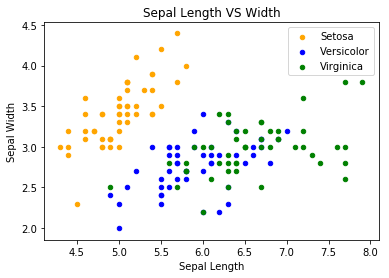

In [ ]:
scatter_plot_sepal = iris_df[iris_df.Species=='Iris-setosa'].plot(kind ='scatter', x = 'SepalLengthCm', y ='SepalWidthCm',color='orange', label='Setosa') 
iris_df[iris_df.Species=='Iris-versicolor'].plot(kind = 'scatter', x ='SepalLengthCm', y ='SepalWidthCm',color='blue', label='Versicolor',ax=scatter_plot_sepal)
iris_df[iris_df.Species=='Iris-virginica'].plot(kind = 'scatter', x ='SepalLengthCm', y ='SepalWidthCm',color='green', label='Virginica', ax=scatter_plot_sepal)
scatter_plot_sepal.set_xlabel("Sepal Length")
scatter_plot_sepal.set_ylabel("Sepal Width")
scatter_plot_sepal.set_title("Sepal Length VS Width")
scatter_plot_sepal=plt.gcf()
plt.show()

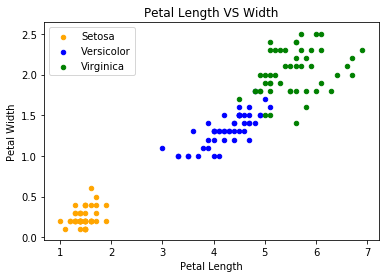

In [ ]:
scatter_plot_petal = iris_df[iris_df.Species=='Iris-setosa'].plot.scatter(x = 'PetalLengthCm', y ='PetalWidthCm', color='orange', label='Setosa') 
iris_df[iris_df.Species=='Iris-versicolor'].plot.scatter(x = 'PetalLengthCm', y ='PetalWidthCm', color='blue', label='Versicolor', ax = scatter_plot_petal)
iris_df[iris_df.Species=='Iris-virginica'].plot.scatter(x = 'PetalLengthCm', y ='PetalWidthCm', color='green', label='Virginica', ax = scatter_plot_petal) 
scatter_plot_petal.set_xlabel("Petal Length")
scatter_plot_petal.set_ylabel("Petal Width")
scatter_plot_petal.set_title("Petal Length VS Width")
scatter_plot_petal=plt.gcf()
plt.show()


Visually it would appear that there are corraelations in these attributes. There is clustering among the different species in respect to Sepal Length and Width. Similarly petal length versus width shows correlatino and each species also forming their own clusters.

## Testing and Training Machine Learning Algorithm

In order to train and test the predcition accuracy of a machine learning algorithm, it is divide the data into a sample for training and another for testing. Since we already know the result for the testing sample it is possible to compare the predcitions the trained algorithm makes against actual results.

For my analysis I will train a K Means alogrithm and test how accurtate its predcitions of Iris species are against the test sample.

In [ ]:
train, test = train_test_split(iris_df, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 6)
(45, 6)


I have generated a training data set of 105 values and testing data set of 45 values

In [ ]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data



In [ ]:
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features


In [ ]:
test_y =test.Species   #output value of test data


In [ ]:
train_X.head(2)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
103,6.3,2.9,5.6,1.8
52,6.9,3.1,4.9,1.5


In [ ]:
train_y.head()  ##output of the training data


103     Iris-virginica
52     Iris-versicolor
5          Iris-setosa
109     Iris-virginica
122     Iris-virginica
Name: Species, dtype: object

In [ ]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class


In [ ]:
model.fit(train_X,train_y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))


The accuracy of the KNN is 0.9777777777777777


([<matplotlib.axis.XTick at 0x2fc87f29d68>,
 <a list of 10 Text xticklabel objects>)

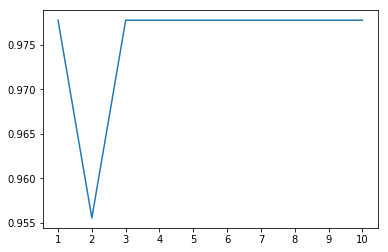

In [ ]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)